In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/himan/Downloads/digit-recognizer/train.csv")
import matplotlib.pyplot as plt


In [23]:
df.head()  ## one col for each pixel

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


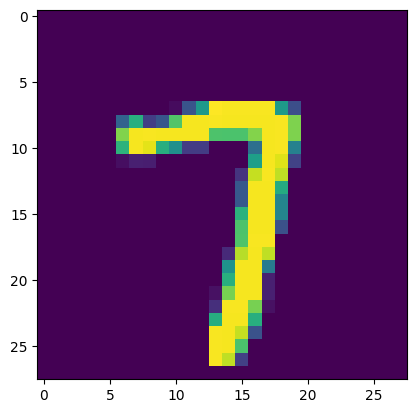

In [24]:
plt.imshow(df.iloc[23514,1:].values.reshape(28,28))

In [25]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape,X_test.shape

((33600, 784), (8400, 784))

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:

y_pred= knn.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [31]:
# Try PCA 

In [32]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()


In [33]:

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [35]:
X_train = pca.fit_transform(X_train)
X_test= pca.transform(X_test)

In [36]:
X_train.shape,X_test.shape

((33600, 784), (8400, 784))

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [46]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [47]:
X_train_trf.shape,X_test_trf.shape

((33600, 100), (8400, 100))

In [48]:
knn =KNeighborsClassifier()

knn.fit(X_train_trf,y_train)


KNeighborsClassifier()

In [49]:
y_pred = knn.predict(X_test_trf)

In [50]:
accuracy_score(y_pred,y_test)

0.9535714285714286

In [51]:
pca.explained_variance_ # eigen_value

array([40.67111198, 29.17023401, 26.74459621, 20.85344791, 18.14891878,
       15.85298249, 13.87108099, 12.48058962, 11.0279422 , 10.09582496,
        9.63317784,  8.62785716,  8.06302891,  7.89511345,  7.44167514,
        7.17032231,  6.73265535,  6.62743019,  6.41497738,  6.25806399,
        5.90492479,  5.76518624,  5.52080301,  5.31996203,  5.18303105,
        4.93430873,  4.90644429,  4.71793464,  4.49806358,  4.43121889,
        4.32573317,  4.23470558,  4.10284551,  4.06703505,  4.02318056,
        3.84051776,  3.8185559 ,  3.71247688,  3.60772795,  3.4713681 ,
        3.4272774 ,  3.38620494,  3.28975824,  3.22606463,  3.21567787,
        3.1556116 ,  3.12374223,  3.10135116,  3.05637042,  3.03429253,
        2.95711359,  2.93130008,  2.8626558 ,  2.82186001,  2.79656419,
        2.76837068,  2.71014325,  2.68150931,  2.64066915,  2.61949359,
        2.55275592,  2.52590891,  2.47779494,  2.43471388,  2.41016047,
        2.36282699,  2.33963817,  2.29634878,  2.2892791 ,  2.24

In [53]:
pca.components_.shape  #eigen vector

(100, 784)

for i in range(1,785):   ## for i cols
    pca = PCA(n_components=i)
    X_train_trf= pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)


    print(accuracy_score(y_test,y_pred))

In [54]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239, 0.02966263, 0.02581562,
       0.0225498 , 0.01973068, 0.0177528 , 0.01568651, 0.01436063,
       0.01370255, 0.01227255, 0.01146912, 0.01123027, 0.01058528,
       0.0101993 , 0.00957675, 0.00942707, 0.00912487, 0.00890168,
       0.00839936, 0.00820059, 0.00785297, 0.00756729, 0.00737251,
       0.00701872, 0.00697909, 0.00671094, 0.00639819, 0.00630311,
       0.00615306, 0.00602358, 0.00583602, 0.00578508, 0.0057227 ,
       0.00546288, 0.00543164, 0.00528075, 0.00513175, 0.00493779,
       0.00487507, 0.00481665, 0.00467946, 0.00458886, 0.00457409,
       0.00448865, 0.00444331, 0.00441146, 0.00434748, 0.00431608,
       0.0042063 , 0.00416958, 0.00407194, 0.00401391, 0.00397792,
       0.00393782, 0.003855  , 0.00381427, 0.00375617, 0.00372605,
       0.00363112, 0.00359294, 0.0035245 , 0.00346322, 0.00342829,
       0.00336096, 0.00332798, 0.0032664 , 0.00325635, 0.00318721,
       0.00314602, 0.00309277, 0.00306537, 0.00303154, 0.00301

In [59]:
pca = PCA(n_components=None)

In [60]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [61]:
pca.explained_variance_.shape

(784,)

In [63]:
pca.components_.shape

(784, 784)

In [66]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

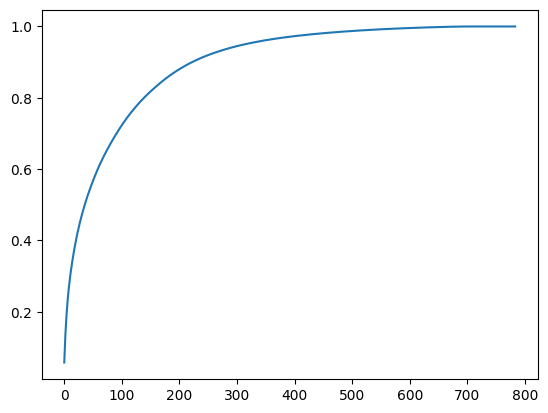

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [78]:
pca = PCA(n_components=225)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [79]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801391,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780644, 0.57198888, 0.57606882, 0.58008887, 0.58407222,
       0.58801821, 0.59188693, 0.59571888, 0.5994844 , 0.60322634,
       0.60687486, 0.61048288, 0.61402174, 0.61750116, 0.62094439,
       0.62432376, 0.62767366, 0.63099374, 0.63426254, 0.63746762,
       0.64065538, 0.64376926, 0.64686559, 0.64992389, 0.65296